# Section 4 The MNIST dataset


## Section 1: downloading the data, and visualising it
In XXX somebody decided to start 

The MNIST dataset is used in so tutorials, as it is a great practical example to test your network on. New novel network architectures often show how well they perform on the MNIST dataset. Even if your new network architecture does not perform better, it's often easy to show interesting features using the MNIST dataset. As it's used very often, loading the MNIST dataset is included in your installation of Tensorflow. 

Execute the following code will either load the data, and if it's your first time loading the data it will download the data. 


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Visualising MNIST
mnist

In [17]:
print(mnist)
print(mnist.train)
print(mnist.train.next_batch(5))
images, labels = mnist.train.next_batch(5)
print(images)
print(len(images[0]))
print(28*28)
print(labels)

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f30e81b67f0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f30d6a89e10>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f30d6a96ef0>)
(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32), array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
784
78

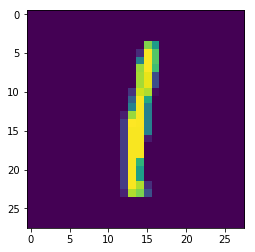

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


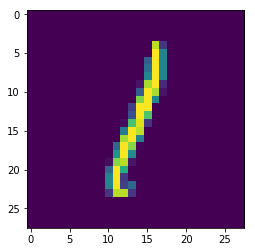

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


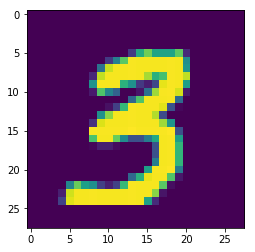

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


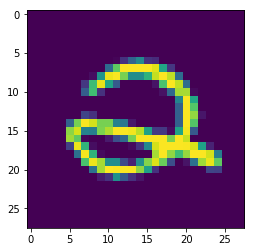

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


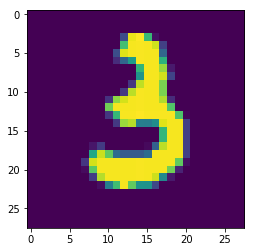

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


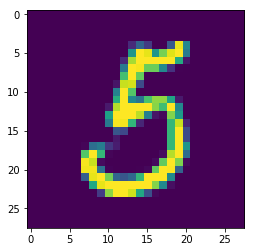

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


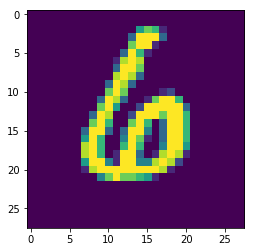

[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


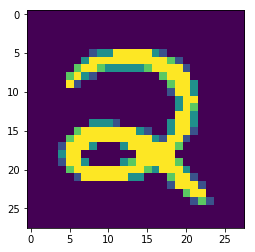

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


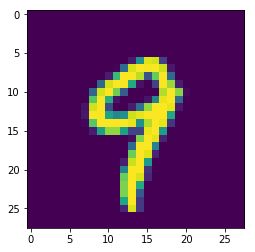

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


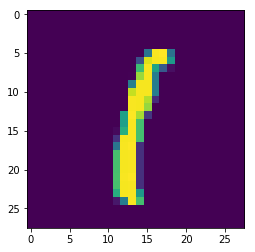

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


In [21]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
images, labels = mnist.train.next_batch(10)
for image, label in zip(images, labels):
    image_reshaped = np.reshape(image,(28,28) ) # https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html
    plt.imshow(image_reshaped)
    plt.show()
    print(label)

### Nicer visualisations and difficult data
http://www.pinchofintelligence.com/simple-introduction-to-tensorboard-embedding-visualisation/
http://yaroslavvb.blogspot.nl/2011/09/notmnist-dataset.html
![not mnist](http://yaroslavvb.com/upload/notMNIST/nmn.png)

## Section 2: trying the network we made in chapter 3, and comparing it to the state of the art
Now let's try to build a simple neural network to classify these images. By now you are already familiar with the way you build a simple neural network in Tensorflow, so I won't make it very fancy. 


In [22]:
import tensorflow as tf
LEARNING_RATE = 0.05
x_placeholder = tf.placeholder(tf.float32, [None, 784], name="x_placeholder")
y_placeholder = tf.placeholder(tf.float32, [None, 10], name="y_placeholder")
dense1 = tf.layers.dense(inputs=x_placeholder, units=400, activation=tf.nn.relu, name="first_dense_layer")
dense2 = tf.layers.dense(inputs=dense1, units=100, activation=tf.nn.relu, name="second_dense_layer")
predicted_class = tf.layers.dense(inputs=dense2, units=10, activation=tf.nn.relu, name="outputprediction_layer")

loss = tf.losses.mean_squared_error(y_placeholder,predicted_class)
optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

In [23]:
init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
sess = tf.Session() # https://www.tensorflow.org/api_docs/python/tf/Session
sess.run(init)

In [29]:
BATCH_SIZE = 128
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
    opt_res, current_loss = sess.run([optimizer, loss], feed_dict={x_placeholder: batch_xs, y_placeholder: batch_ys})
    print(current_loss)


0.0340696
0.0320354
0.0282054
0.028431
0.029145
0.035783
0.0315572
0.0291703
0.0348508
0.031007
0.0289197
0.0311898
0.0303855
0.0286903
0.0321843
0.0323505
0.0337139
0.0252654
0.0317376
0.0343053
0.029145
0.0264151
0.0334617
0.0298012
0.0324866
0.0308819
0.0275844
0.0253575
0.0322746
0.031714
0.0215322
0.0351368
0.0293605
0.0313051
0.0293475
0.0319451
0.0270673
0.0302221
0.0329847
0.03218
0.0316333
0.0329818
0.0306013
0.0319488
0.0301639
0.0264672
0.0258928
0.0256793
0.027149
0.0297762
0.024778
0.0316236
0.0313959
0.0304916
0.0308145
0.0255833
0.0328352
0.0293763
0.0255278
0.0306877
0.0344167
0.0311406
0.0350127
0.0312215
0.0238653
0.0282945
0.0273698
0.0292564
0.0287259
0.0326325
0.0307454
0.0256812
0.0316834
0.0333036
0.0265615
0.0270263
0.028222
0.0276712
0.0262979
0.030495
0.0281337
0.0263143
0.0315857
0.0267599
0.0294348
0.0270066
0.0261544
0.0258849
0.0324217
0.0252954
0.0315076
0.0276639
0.0283259
0.0343001
0.0299045
0.0249045
0.0306085
0.0338327
0.0322984
0.0305084
0.0319851
0.

KeyboardInterrupt: 

In [30]:
TEST_BATCH_SIZE = 1000
batch_xs, batch_ys = mnist.test.next_batch(TEST_BATCH_SIZE)
predicted_chars = sess.run(predicted_class, feed_dict={x_placeholder: batch_xs})
correct_predictions = 0
for truechar, predictedchar in zip(batch_ys, predicted_chars):
    if np.argmax(truechar) == np.argmax(predictedchar): # https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
        correct_predictions += 1
print(correct_predictions)

809


### Comparing to state of the art
Although what we have right now seems pretty good, it's important to take a look at what the state of the art is doing: http://rodrigob.github.io/are_we_there_yet/build/

As you can see we should not be happy with our results, and continue learning to improve our network. 



## Section 4 or 3?: from activations to probabilities: the softmax function
A question I find way too often on Stackoverflow is how people can go from an activation in their final layer to a probability that the network is "correct". Imagine the network gives you the following activation: `[0.1, 0.3, 0.9, 0.4]`. We probably want guess the network predicted the 3rd class. There are several methods to 'normalize' this outcome. A popular way to do this with neural networks is the [softmax function, or 'normalized exponential function'](https://en.wikipedia.org/wiki/Softmax_function).

The softmax function is: $Softmax(vector_i) \frac{e^{vector_i}}{\sum_j e^{vector_j} }$
The softmax function is a great nonregularity to add to on the final layer of our neural network. 

If you are wondering why in particular the softmax function is such a good function, take a look at the [following Stackoverflow answer](https://stackoverflow.com/questions/17187507/why-use-softmax-as-opposed-to-standard-normalization). 




## Section 3: improving the network by understanding optimization functions
Right now we used the mean squared error to determine our loss, and the gradient descent optimization function. 

### Loss functions
Mean squared error not only gives a penalty for not being certain about the class you want, it also gives a penalty for being "confused" about another class. For many classification problems it turns out that it's beneficial to mostly penalise not being very certain about your prediction. 

The list with losses available in Tensorflow [can be found here.](https://www.tensorflow.org/api_docs/python/tf/losses) A short article about them can be found on [this site](https://www.tensorflow.org/api_guides/python/contrib.losses)

A great article about why you should use cross-entropy loss can be [found here](https://jamesmccaffrey.wordpress.com/2013/11/05/why-you-should-use-cross-entropy-error-instead-of-classification-error-or-mean-squared-error-for-neural-network-classifier-training/). 
### Optimization functions

## Section 5: Understanding and adding convolutional layers and comparing our performance to state of the art. 

One thing we can easily change is the activation function of our network. In [this paper]( https://arxiv.org/abs/1502.01852) authors attempt to solve a more difficult problem: imagenet. In this competition you see many images, and you have to guess what's in the image. To improve upon the state of the art they compare several activation functions. 